# Prendre en main l'API Python d'ArcGIS - épisode 7
## Analyse spatiale et utilisation des services de localisation d'ArcGIS

C'est déjà l'heure du septième tutoriel de la **[série de l'été consacrée à la prise en main de l'API Python d'ArcGIS](https://www.codethemap.fr/2024/05/prise-en-main-api-python-arcgis-intro.html)**! Cette fois-ci, nous allons utiliser l'API pour faire de l'analyse spatiale. Celle-ci permet de scripter et d'automatiser [les outils de géotraitement du portail](https://doc.arcgis.com/en/arcgis-online/analyze/perform-analysis.htm) ainsi que l'utilisation des services de localisation d'ArcGIS. Nous apprendrons à nous en servir pour du géocodage simple, du géocodage d'adresses par lot, du calcul d'isochrones et du calcul d'itinéraires.   

Notez qu'un compte Creator ou supérieur avec des privilèges de publication de contenu sont nécessaires.
Vous pouvez exécuter ce Notebook directement dans ArcGIS Notebooks sur ArcGIS Online (disponible par défaut si votre administrateur vous a accordé les droits nécessaires), dans ArcGIS Enterprise (disponible avec le rôle serveur correspondant) ou en le téléchargeant et en l'ouvrant sur ArcGIS Pro (plus d'infos [dans la doc](https://pro.arcgis.com/fr/pro-app/latest/arcpy/get-started/pro-notebooks.htm)). Vous pouvez également l'exécuter dans n'importe quel environnement d'exécution de votre choix, mais veillez dans ce cas à [avoir installé les packages nécessaires](https://developers.arcgis.com/python/guide/anaconda/).

### 1/ Import des bibliothèques et connexion au GIS 

Nous commençons par importer les différentes bibliothèques nécessaires.

In [1]:
import pandas as pd

from arcgis.gis import GIS
from arcgis.geocoding import geocode, batch_geocode
from arcgis.features import use_proximity, FeatureCollection
#from arcgis.geometry import Point

Durant ce tutoriel, nous allons utiliser les services de localisation d'ArcGIS. Nous allons géocoder 43 adresses, faire un calcul d'isochrones et calculer 3 routes, ce qui devrait consommer au total moins de 5 crédits si vous consommez via les services ArcGIS Online, et est inclus dans les transactions gratuites si vous consommez via un compte développeur sur le site [ArcGIS Location Platform](location.arcgis.com). Pour connaître le prix des transactions de services, vous pouvez vous référer à [la documentation pour la consommation de crédits](https://pro.arcgis.com/fr/pro-app/latest/tool-reference/appendices/geoprocessing-tools-that-use-credits.htm), et dans [l'onglet Pricing du site ArcGIS Location Platform](https://location.arcgis.com/pricing/) si vous consommez en pay-as-you-use.

- *Si vous êtes utilisateur ArcGIS Online*, vous pouvez vous connecter via votre compte d'utilisateur, et vous allez consommer les crédits de votre compte ArcGIS Online. Vous pouvez également choisir d'utiliser une clé d'API pour vous connecter. Cette option est pratique si vous souhaitez pouvoir suivre la consommation de crédits de vos scripts.   
- *Si vous êtes utilisateur ArcGIS Enterprise*, la connexion utilisateur fonctionnera uniquement [si votre portail est configuré pour pouvoir consommer les services d'ArcGIS](https://enterprise.arcgis.com/fr/portal/latest/administer/windows/configure-arcgis-online-utility-services.htm). Si ça n'est pas le cas, sachez que vous pouvez créer un compte développeur gratuitement sur le site [ArcGIS Location Platform](https://location.arcgis.com) et accéder aux services via une clé d'API. Le compte développeur vous permet d'effectuer gratuitement un certain nombre de transactions de services, ce qui devrait être suffisant pour suivre le tuto.

Pour apprendre à configurer une clé d'API, vous pouvez vous rendre sur [cet article](https://www.codethemap.fr/2024/08/api-key-arcgis-services.html). Vous aurez besoin d'activer les privilèges de géocodage et de calcul d'itinéraires simples.

#### Connexion par utilisateur

La connexion est à adapter selon votre environnement et votre méthode d'authentification. [Voir l'aide en ligne pour plus d'informations](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/).  
Si vous êtes connectés en tant qu'admin, la cellule va vous renvoyer un message rouge pour vous prévenir qu'il faut faire attention aux opérations que vous utilisez. Cela n'empêche pas votre code de s'exécuter correctement.

In [2]:
gis = GIS("home")

#### Alternative pour la connexion si votre environnement n'est pas directement connecté à votre portail
###à modifier avec vos informations d'authentification
#gis =GIS(url="https://url.devotre.org/portal",username="nom_utilisateur",password="motdepasse") 

/opt/conda/lib/python3.11/site-packages/arcgis/gis/__init__.py:731: UserWarning: You are logged on as plouis_esrifrance with an administrator role, proceed with caution.
  warnings.warn(


#### Connexion par clé d'API

In [ ]:
#gis = GIS(api_key=<your api key>)

### 1/ Géocodage d'une adresse simple

Le géocodage permet de trouver un point XY à partir d'une adresse. Cela peut permettre d'afficher sur une carte un endroit dont ne vous possédez pas les coordonnées, mais seulement l'adresse ou le nom du lieu. Pour utiliser le service de géocodage d'ArcGIS dans l'API Python, nous devrons faire appel au module [`geocoding`](https://developers.arcgis.com/python/api-reference/arcgis.geocoding.html) dont nous avons importé les classes nécessaires dans la première cellule de ce Notebook.  
Je vais utiliser le géocodage pour afficher mon adresse sur une carte. Pour un géocodage simple, nous utiliserons la fonction [`geocode()`](https://developers.arcgis.com/python/api-reference/arcgis.geocoding.html#geocode).  
Je passe mon adresse en argument sous la forme d'une chaîne de caractères. Le paramètre `max_location` me permet de définir le maximum de lieux renvoyés par le service de géocodage. En le réglant sur 1, je demande à ce que seule la correspondance la plus pertinente soit renvoyée. Enfin, grâce à `as_featureset=True`, la méthode retournera un [`FeatureSet`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset) à la place d'une liste, ce qui sera plus pratique pour la manipulation dans mon SIG (affichage sur une carte, analyse, etc.).

In [3]:
geocodage_adresse = geocode(address = "15 place Vendôme, Paris", 
                            max_locations = 1,
                            as_featureset=True
                            ) 

Nous pouvons vérifier que le type de données renvoyé est bien un [`FeatureSet`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset) :

In [4]:
type(geocodage_adresse)

arcgis.features.feature.FeatureSet

Vérifions maintenant nos résultats sur une carte. Nous allons créer une carte puis y ajouter le résultat du géocodage, comme nous avons appris à le faire dans [ce tutoriel](https://www.codethemap.fr/2024/07/api-python-arcgis-contenu-creation-publication-partage-carte.html). Si votre environnement est compatible, il devrait afficher la carte de manière interactive comme cela :  
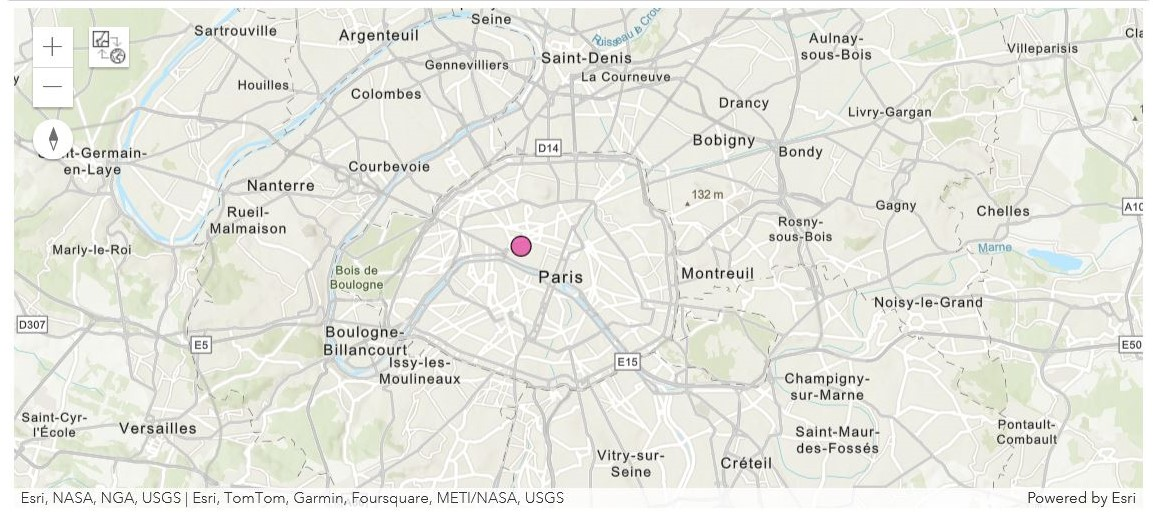

In [5]:
carte = gis.map("Paris", zoomlevel=11)
carte

MapView(layout=Layout(height='400px', width='100%'))

In [6]:
carte.add_layer(geocodage_adresse)

### 2/ Calcul d'isochrones

Maintenant que j'ai localisé mon adresse sur la carte, j'aimerais savoir dans quels endroits je peux me rendre à pieds et en combien de temps depuis chez moi. Pour cela, l'API Python met à disposition la fonction [`create_drive_time_areas()`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#create-drive-time-areas) dans du module  [`use_proximity`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#create-drive-time-areas) que nous avons importé au début du Notebook.  
Comme entrée, [`create_drive_time_areas()`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#create-drive-time-areas) accepte des données au format [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection). Nous pouvons très facilement créer une  [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection) à partir de notre [`FeatureSet`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset) grâce à la méthode [`from_featureset()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureCollection.from_featureset) des [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection) :

In [7]:
feature_collection_adresse = FeatureCollection.from_featureset(geocodage_adresse)

Nous pouvons désormais calculer les isochrones. En entrée de [`create_drive_time_areas()`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#create-drive-time-areas), nous passons la [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection) contenant notre adresse fraîchement créée. Ce point sera le centre des isochrones.   
Nous pouvons choisir un mode de déplacement grâce à `travel_mode` qui peut prendre la valeur de votre choix parmi la liste suivante : `["Driving Distance", "Driving Time", "Rural Driving Distance", "Rural Driving Time", "Trucking Distance", "Trucking Time", "Walking Distance", "Walking Time"]` Vous voyez que nous avons le choix entre un calcul en distance ou en temps, et entre différents moyens de transport. Pour notre part, nous utiliserons le temps de marche `"Walking Time"`.  
`break_values` est aussi un paramètre intéressant car il me permet de choisir le temps ou la distance des isochrones. Ici, je choisis 10, 20, 30 et 60 minutes de marche. L'unité des `break_values` est fixée par le paramètre `break_units` qui peut prendre les valeurs suivantes, en distance ou en temps : `["Seconds", "Minutes", "Hours", "Feet", "Meters", "Kilometers", "Feet", "Miles", "Yards"]`.  
Nous pouvons aussi indiquer un système de projection (ici WGS84 avec le wkid 4326) pour les entités en sortie avec la paramètre `context`.
La fonction renverra un [`FeatureLayer`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer), qui sera enregistré dans mon contenu sur mon portail. Je peux choisir son nom en renseignant le paramètre `output_name`.

In [9]:
temps_marche = use_proximity.create_drive_time_areas(input_layer=feature_collection_adresse, 
                                                travel_mode = "Walking Time",
                                                break_values = [10, 20, 30, 60],
                                                break_units = "Minutes",
                                                context = {'outSR': {"wkid": 4326}},
                                                output_name = "Temps de marche autour de chez moi")

{"cost": 2.0}


Comme pour tous les éléments de mon portail que j'ai stockés dans une variable dans mon script, je peux facilement accéder à l'item interactivement dans mon Notebook en rappelant la variable. Cela me permet d'aller le consulter :

In [10]:
temps_marche

<Item title:"Temps_de_marche_autour_de_chez_moi" type:Feature Layer Collection owner:plouis_esrifrance>

Et nous pouvons également l'ajouter à notre carte :

In [11]:
carte.add_layer(temps_marche)

Voici le résultat :  
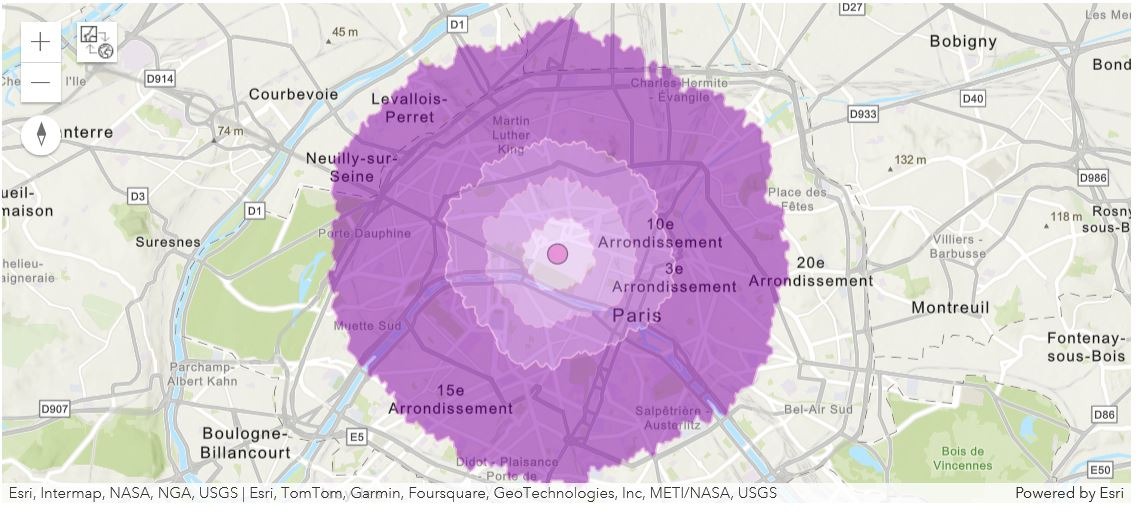

### 3/ Géocodage par lot de plusieurs adresses

C'est bien de savoir jusqu'à où je peux aller en marchant, mais ça serait mieux qu'il y ait 2-3 trucs à faire sur la route, comme par exemple manger. La bonne nouvelle, c'est que j'ai en ma possession une liste de restaurants avec leurs adresses trouvé sur datagouv. J'ai hebergé le csv de cette liste de restaurants à l'adresse suivante : https://raw.githubusercontent.com/JapaLenos/Python-in-ArcGIS/main/Prise-en-main-API-Python/Tuto7-analyse-services-localisation/restaurants_paris.csv. Je peux ensuite lire le csv en tant que Dataframe, et supprimer les lignes contenant les valeurs vides comme nous l'avions appris dans [ce tutoriel]().

In [12]:
df_restaurants_paris = pd.read_csv("https://raw.githubusercontent.com/JapaLenos/Python-in-ArcGIS/main/Prise-en-main-API-Python/Tuto7-analyse-services-localisation/restaurants_paris.csv",
                                   sep = ";", 
                                   low_memory = False) 
df_dropna = df_restaurants_paris.dropna()
df_dropna

,code,Nom restaurant,adresse,ville
0,75014,BEAUNIER,"43, RUE BEAUNIER",PARIS
1,75005,MOUFFETARD,"20, RUE ORTOLAN",PARIS
2,75008,MARCHE DE L'EUROPE,"11, RUE MALLEVILLE",PARIS
3,75015,LA QUINTINIE,"18, RUE BARGUE",PARIS
4,75003,AU MAIRE,"2, RUE AU MAIRE",PARIS
5,75018,JOSEPH DE MAISTRE,"88, RUE JOSEPH DE MAISTRE",PARIS
6,75002,SAINT-SAUVEUR,"8, RUE SAINT-SAUVEUR",PARIS
7,75002,GRAMONT,"28, RUE GRAMONT",PARIS
8,75013,TOLBIAC,"166, RUE DE TOLBIAC",PARIS
9,75017,EPINETTES,"51, RUE DES EPINETTES",PARIS


Cette fois-ci, nous n'allons pas géocoder une seule adresse mais plusieurs adresses par lot, aussi appelé en batch. Pour cela, nous devrons cette fois-ci utiliser la fonction [`batch_geocode()`](https://developers.arcgis.com/python/api-reference/arcgis.geocoding.html#batch-geocode), toujours du module [`geocoding`](https://developers.arcgis.com/python/api-reference/arcgis.geocoding.html).  
La documentation m'indique que ma liste d'adresses peut être formatée de la manière suivante : 
`addresses= [{“Address”: “380 New York St.”, “City”: “Redlands”, “Region”: “CA”, “Postal”: “92373”},{ “Address”: “1 World Way”, “City”: “Los Angeles”, “Region”: “CA”, “Postal”: “90045”}]`. Dans notre jeu de données, nous n'aurons pas les informations sur la région mais ça n'est pas grave, notez plus que plus d'informations vous avez sur l'adresse, plus cela pourra aider le géocodeur à faire un choix entre 2 adresses pouvant exister dans 2 villes différentes par exemple.   
Je manipule mon DataFrame pour en obtenir une liste interprétable par la fonction :

In [13]:
adresses_restaurants = [{"Address": row["adresse"], "City": row["ville"], "City": row["ville"], "Postal" : row["code"]} for index, row in df_dropna.iterrows()]
print(adresses_restaurants)

[{'Address': '43, RUE BEAUNIER', 'City': 'PARIS', 'Postal': 75014}, {'Address': '20, RUE ORTOLAN', 'City': 'PARIS', 'Postal': 75005}, {'Address': '11, RUE MALLEVILLE', 'City': 'PARIS', 'Postal': 75008}, {'Address': '18, RUE BARGUE', 'City': 'PARIS', 'Postal': 75015}, {'Address': '2, RUE AU MAIRE', 'City': 'PARIS', 'Postal': 75003}, {'Address': '88, RUE JOSEPH DE MAISTRE', 'City': 'PARIS', 'Postal': 75018}, {'Address': '8, RUE SAINT-SAUVEUR', 'City': 'PARIS', 'Postal': 75002}, {'Address': '28, RUE GRAMONT', 'City': 'PARIS', 'Postal': 75002}, {'Address': '166, RUE DE TOLBIAC', 'City': 'PARIS', 'Postal': 75013}, {'Address': '51, RUE DES EPINETTES', 'City': 'PARIS', 'Postal': 75017}, {'Address': '18-22, RUE POLIVEAU', 'City': 'PARIS', 'Postal': 75005}, {'Address': '15, RUE CHARCOT', 'City': 'PARIS', 'Postal': 75013}, {'Address': '32, RUE DE LA BRECHE AUX LOUPS', 'City': 'PARIS', 'Postal': 75012}, {'Address': '4, RUE DE LA PERLE', 'City': 'PARIS', 'Postal': 75003}, {'Address': '12, RUE DE N

Je peux maintenant utiliser la fonction [`batch_geocode()`](https://developers.arcgis.com/python/api-reference/arcgis.geocoding.html#batch-geocode) en passant ma liste d'adresses en argument. A nouveau, j'utilise le paramètre `as_featureset` que la fonction retourne un [`FeatureSet`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset).

In [15]:
geocodage_restaurants = batch_geocode(addresses = adresses_restaurants, as_featureset = True)
geocodage_restaurants

<FeatureSet> 42 features

J'affiche le résultat sur la carte :

In [16]:
carte.add_layer(geocodage_restaurants)

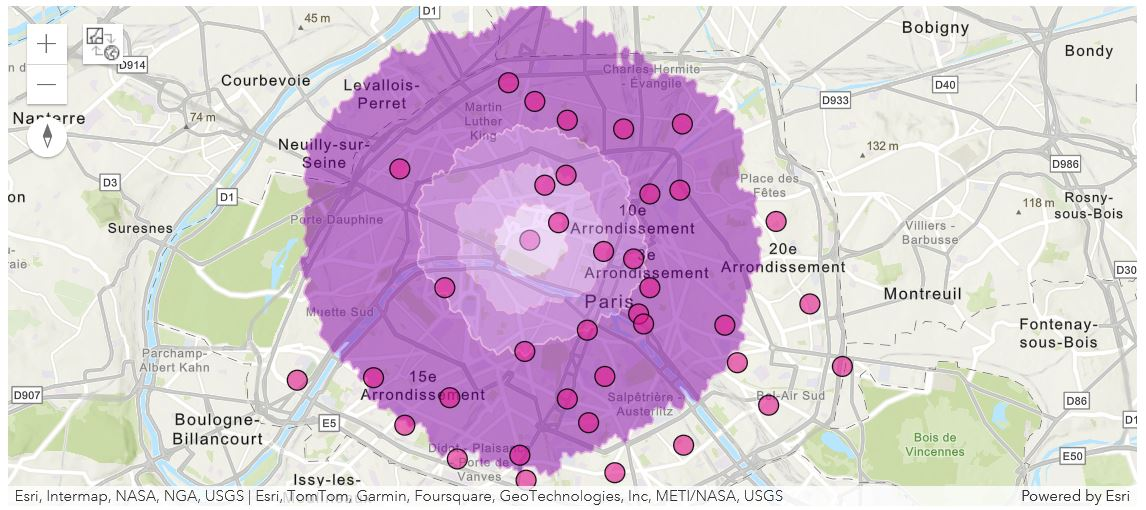

### 4/ Sélection spatiale

Je vais maintenant récupérer uniquement les restaurants situés à maximum 20 minutes de chez moi. Ce sont les restaurants situé à l'intérieur du premier ou du second isochrone. Pour faire cela avec l'API Python d'ArcGIS, le plus facile est d'utiliser la géométrie de mes données en accédant à celle-ci via un Spatially enabled DataFrame (SeDF). Si ce que je dis vous paraît totalement exotique, c'est que vous n'avez pas suivi le [tutoriel #5 de la série](https://www.codethemap.fr/2024/07/api-python-arcgis-contenu-preparation-donnees-sedf.html), que je vous conseille fortement (j'ai entendu dire qu'il était plutôt pas mal).  
Pour accéder aux données de géocodage des restaurants sous la forme d'un SeDF, je peux accéder à la propriété `sdf` du [`FeatureSet`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset) :

In [17]:
sedf_restaurants = geocodage_restaurants.sdf
sedf_restaurants

,ResultID,Loc_name,Status,Score,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,OBJECTID,SHAPE
0,0,World,M,100.0,"43 Rue Beaunier, 75014, 14e Arrondissement, Pa...","43 Rue Beaunier, 75014, 14e Arrondissement, Pa...",43 Rue Beaunier,PointAddress,,,...,48.824472,2.327901,48.824452,2.326901,2.328901,48.823452,48.825452,,1,"{""x"": 2.327902616154, ""y"": 48.82447196116, ""sp..."
1,1,World,M,100.0,"20 Rue Ortolan, 75005, 5e Arrondissement, Pari...","20 Rue Ortolan, 75005, 5e Arrondissement, Pari...",20 Rue Ortolan,PointAddress,,,...,48.843193,2.349679,48.843235,2.348679,2.350679,48.842235,48.844235,,2,"{""x"": 2.349681063718, ""y"": 48.843192941902, ""s..."
2,3,World,M,100.0,"18 Rue Bargue, 75015, 15e Arrondissement, Pari...","18 Rue Bargue, 75015, 15e Arrondissement, Pari...",18 Rue Bargue,PointAddress,,,...,48.839351,2.307187,48.839295,2.306187,2.308187,48.838295,48.840295,,3,"{""x"": 2.307246337788, ""y"": 48.839350803215, ""s..."
3,2,World,M,97.52,"11 Rue Maleville, 75008, 8e Arrondissement, Pa...","11 Rue Maleville, 75008, 8e Arrondissement, Pa...",11 Rue Maleville,PointAddress,,,...,48.877357,2.313944,48.87728,2.312944,2.314944,48.87628,48.87828,,4,"{""x"": 2.313940880035, ""y"": 48.877356615326, ""s..."
4,6,World,M,100.0,"8 Rue Saint-Sauveur, 75002, 2e Arrondissement,...","8 Rue Saint-Sauveur, 75002, 2e Arrondissement,...",8 Rue Saint-Sauveur,PointAddress,,,...,48.865932,2.349373,48.865985,2.348373,2.350373,48.864985,48.866985,,5,"{""x"": 2.349365401244, ""y"": 48.865932458484, ""s..."
5,7,World,M,100.0,"28 Rue de Gramont, 75002, 2e Arrondissement, P...","28 Rue de Gramont, 75002, 2e Arrondissement, P...",28 Rue de Gramont,PointAddress,,,...,48.870977,2.337032,48.870969,2.336032,2.338032,48.869969,48.871969,,6,"{""x"": 2.336965884239, ""y"": 48.870976562086, ""s..."
6,5,World,M,100.0,"88 Rue Joseph de Maistre, 75018, 18e Arrondiss...","88 Rue Joseph de Maistre, 75018, 18e Arrondiss...",88 Rue Joseph de Maistre,PointAddress,,,...,48.89286,2.33046,48.892886,2.32946,2.33146,48.891886,48.893886,,7,"{""x"": 2.330388520998, ""y"": 48.892860453992, ""s..."
7,8,World,M,100.0,"166 Rue de Tolbiac, 75013, 13e Arrondissement,...","166 Rue de Tolbiac, 75013, 13e Arrondissement,...",166 Rue de Tolbiac,PointAddress,,,...,48.825933,2.352573,48.826033,2.351573,2.353573,48.825033,48.827033,,8,"{""x"": 2.352577681817, ""y"": 48.825933010702, ""s..."
8,4,World,M,100.0,"2 Rue au Maire, 75003, 3e Arrondissement, Pari...","2 Rue au Maire, 75003, 3e Arrondissement, Pari...",2 Rue au Maire,PointAddress,,,...,48.864413,2.357721,48.864444,2.356721,2.358721,48.863444,48.865444,,9,"{""x"": 2.357714866455, ""y"": 48.864412819438, ""s..."
9,10,World,M,99.2,"22 Rue Poliveau, 75005, 5e Arrondissement, Par...","22 Rue Poliveau, 75005, 5e Arrondissement, Par...",22 Rue Poliveau,PointAddress,,,...,48.840326,2.359441,48.840358,2.358441,2.360441,48.839358,48.841358,18,10,"{""x"": 2.359443969261, ""y"": 48.840326414835, ""s..."


Pour obtenir un SeDF à partir des données d'isochrones, la manipulation est cette fois-ci légèrement différente puisqu'il s'agit d'un [`FeatureLayer`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer). Je peux lire celui-ci  sous la forme d'un SeDF grâce à la méthode [`from_layer()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.from_layer) dans laquelle je passe en argument mon [`FeatureLayer`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer).

In [18]:
sedf_isochrones = pd.DataFrame.spatial.from_layer(temps_marche.layers[0])
sedf_isochrones

,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,Name_1,Loc_name,Score,Match_addr,LongLabel,...,Xmin,Xmax,Ymin,Ymax,ExInfo,Breaks,AdditionalTime,AdditionalDistance,AnalysisArea,SHAPE
0,1,Location 1 : 30 - 60,30.0,60.0,1,Location 1,World,100,"15 Place Vendôme, 75001, 1er Arrondissement, P...","15 Place Vendôme, 75001, 1er Arrondissement, P...",...,2.327887,2.329887,48.866956,48.868956,,<NA>,0.0,0.0,49.031764,"{""rings"": [[[2.33304896800007, 48.910700708], ..."
1,2,Location 1 : 20 - 30,20.0,30.0,1,Location 1,World,100,"15 Place Vendôme, 75001, 1er Arrondissement, P...","15 Place Vendôme, 75001, 1er Arrondissement, P...",...,2.327887,2.329887,48.866956,48.868956,,<NA>,0.0,0.0,8.920548,"{""rings"": [[[2.32563790100005, 48.888916662], ..."
2,3,Location 1 : 10 - 20,10.0,20.0,1,Location 1,World,100,"15 Place Vendôme, 75001, 1er Arrondissement, P...","15 Place Vendôme, 75001, 1er Arrondissement, P...",...,2.327887,2.329887,48.866956,48.868956,,<NA>,0.0,0.0,4.99027,"{""rings"": [[[2.32698536800007, 48.881954751000..."
3,4,Location 1 : 0 - 10,0.0,10.0,1,Location 1,World,100,"15 Place Vendôme, 75001, 1er Arrondissement, P...","15 Place Vendôme, 75001, 1er Arrondissement, P...",...,2.327887,2.329887,48.866956,48.868956,,<NA>,0.0,0.0,1.66406,"{""rings"": [[[2.32765910100005, 48.874768261], ..."


Les isochrones contenant les temps de marche de 0 à 10min et de 10 à 20min sont contenues dans les deux dernières lignes du SeDF, donc aux index 3 et 2. J'accède à leur géométrie contenue dans la colonne `SHAPE` :

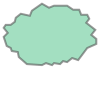

In [19]:
geom_isochrone_10min = sedf_isochrones.iloc[3].SHAPE
geom_isochrone_10min

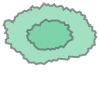

In [20]:
geom_isochrone_20min = sedf_isochrones.iloc[2].SHAPE
geom_isochrone_20min

La méthode [`disjoint()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoSeriesAccessor.disjoint) permet de comparer deux géométries, et renvoie une série de booléens : True si les sont géométries des entités comparées sont disjointes (ne s'intersectent pas) et False sinon (les données s'intersectent). `== False` me permet ensuite d'inverser le résultat, et de passer à True les géométries non disjointes et à False les géométries disjointes. J'utilise donc cette méthode sur la géométrie du sedf contenant les restaurants, et passe en argument la géométrie du sedf contenant les limites de bordeaux récupérée au-dessus.  
Je le fais consécutivement sur les 2 isochrones, puis je combine le résultat des 2 requêtes, et obtiens la valeur `True` pour tous les restaurants situés à 20 minutes à pieds ou moins.

In [21]:
requete_10min = sedf_restaurants.SHAPE.geom.disjoint(geom_isochrone_10min) == False
requete_20min = sedf_restaurants.SHAPE.geom.disjoint(geom_isochrone_20min) == False
requete_combinee = requete_10min | requete_20min

J'utilise ensuite cette série booléenne pour filtrer le dataframe des compteurs de trafic. En passant la série en entrée de la propriété `loc` de mon dataframe, j'accède uniquement aux lignes pour lesquelles la valeur du booléen est True. La fonction `copy()` permet de créer une copie du dataframe filtré, afin d'éviter les problèmes liés à la modification d'une vue sur l'original.

In [23]:
sedf_restaurants_proches = sedf_restaurants.loc[requete_combinee].copy()
sedf_restaurants_proches

,ResultID,Loc_name,Status,Score,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,OBJECTID,SHAPE
4,6,World,M,100.0,"8 Rue Saint-Sauveur, 75002, 2e Arrondissement,...","8 Rue Saint-Sauveur, 75002, 2e Arrondissement,...",8 Rue Saint-Sauveur,PointAddress,,,...,48.865932,2.349373,48.865985,2.348373,2.350373,48.864985,48.866985,,5,"{""x"": 2.349365401244, ""y"": 48.865932458484, ""s..."
5,7,World,M,100.0,"28 Rue de Gramont, 75002, 2e Arrondissement, P...","28 Rue de Gramont, 75002, 2e Arrondissement, P...",28 Rue de Gramont,PointAddress,,,...,48.870977,2.337032,48.870969,2.336032,2.338032,48.869969,48.871969,,6,"{""x"": 2.336965884239, ""y"": 48.870976562086, ""s..."
38,29,World,M,100.0,"8 Rue de la Tour des Dames, 75009, 9e Arrondis...","8 Rue de la Tour des Dames, 75009, 9e Arrondis...",8 Rue de la Tour des Dames,PointAddress,,,...,48.877788,2.333329,48.877815,2.332329,2.334329,48.876815,48.878815,,39,"{""x"": 2.333328641175, ""y"": 48.877788073792, ""s..."


Nous pouvons afficher les résultats sur la carte :

In [24]:
sedf_restaurants_proches.spatial.plot(carte)

True

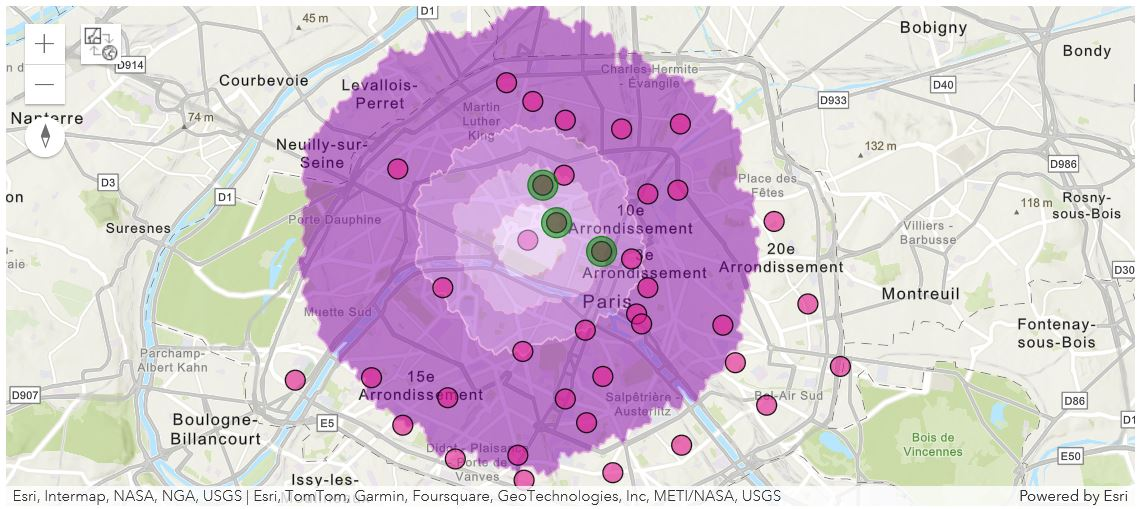

### 5/ Calcul d'itinéraires

Je vais maintenant calculer les itinéraires pour me rendre dans chacun des 3 restaurants situés à moins de 20 minutes à pieds. Comme tout à l'heure, nous allons utiliser une fonction du module [`use_proximity`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#create-drive-time-areas). Il s'agit cette fois-ci de [`connect_origins_to_destinations()`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#connect-origins-to-destinations), qui prend elle aussi en entrée des données de type [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection). Je convertis donc mon SeDF en [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection), en passant par l'étape [`FeatureSet`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset).

In [25]:
features_set_restaurants = sedf_restaurants_proches.spatial.to_featureset()
feature_collection_restaurants = FeatureCollection.from_featureset(features_set_restaurants)

Nous pouvons désormais appeler [`connect_origins_to_destinations()`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#connect-origins-to-destinations). En couche d'origine (point(s) de départ de(s) l'itinéraire(s)), je transmets mon adresse au format [`FeatureCollection`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection) , et en couche de destination (point(s) d'arrivée de(s) l'itinéraire(s)) les restaurants proches, dans le même format. A nouveau, il est possible de choisir le mode de transport parmi les éléments de la liste suivante : `["Driving Distance", "Driving Time", "Rural Driving Distance", "Rural Driving Time", "Trucking Distance", "Trucking Time", "Walking Distance", "Walking Time"]`. Je choisis une distance de marche. Enfin, la fonction va publier les résultats sous forme d'un [`FeatureLayer`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer) dans mon contenu, dont je peux choisir le nom.

In [27]:
chemins = use_proximity.connect_origins_to_destinations(origins_layer = feature_collection_adresse, 
                                                        destinations_layer = feature_collection_restaurants, 
                                                        measurement_type = "Walking Distance", 
                                                        output_name = "Calcul trajets vers restaurants")
chemins

{"cost": 0.015}


<Item title:"Calcul_trajets_vers_restaurants" type:Feature Layer Collection owner:plouis_esrifrance>

J'ajoute l'item fraîchement créé à la carte :

In [28]:
carte.add_layer(chemins)

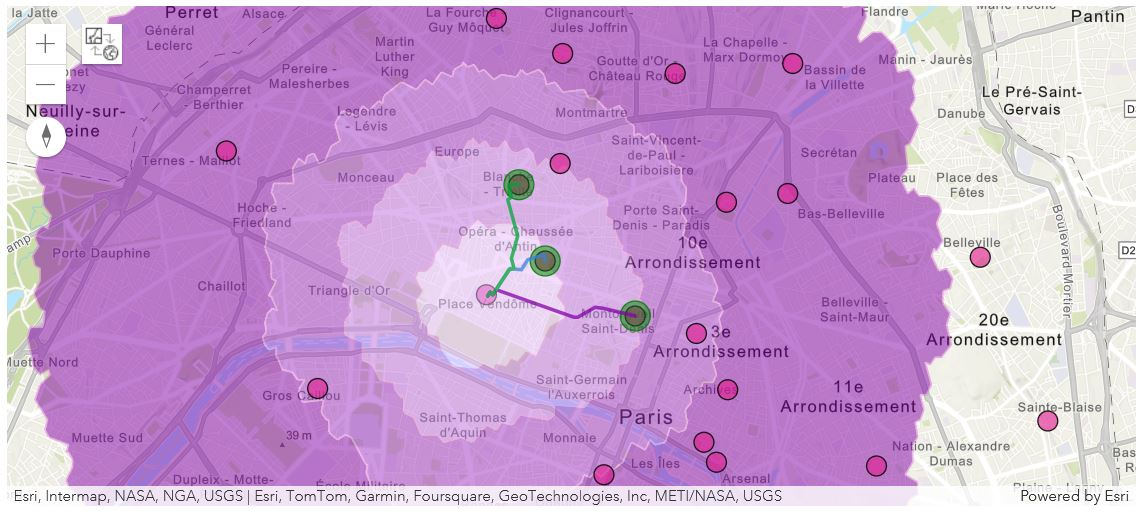

Dans ce tutoriel, nous avons vu deux fonctions du module [`use_proximity`](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html#create-drive-time-areas). Sachez que ce module met à disposition d'autres outils accessibles sous la forme de fonctions que vous pourrez retrouver [dans la doc](https://developers.arcgis.com/python/api-reference/arcgis.features.use_proximity.html).  
Notez également que ce module ne représente que l'une des boites à outils disponibles (en l'occurence regroupant les outils d'analyse de proximité), mais vous pourrez en retrouvez de nombreuses autres vous permettant de faire d'autres types d'analyses spatiales (analyse de tendances dans les données, analyse de l'élévation, synthèse des données, analyses de l'hydrologie,...) Je vous invite à consulter [la documentation](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#submodules) pour découvrir tout cela.

### 6/ Publication des résultats

Les résultats des calculs d'isochrones et d'itinéraires sont d'ores et déjà enregistrés, mais j'aimerais aussi conserver les résultats du géocodage. La manière la plus simple pour cle est d'accéder aux données sous forme de Spatially enabled Dataframe puis de les publier. Le SeDF des restaurants et celui des restaurants proches existe déjà, je n'ai plus qu'à stocker le dernier, celui de mon adresse, dans une variable :

In [29]:
sedf_adresse = geocodage_adresse.sdf

Je créée ensuite une liste de listes contenant chacune la variable contenant un des SeDF ainsi que le nom que je souhaite donner au [`FeatureLayer`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer) une fois qu'il sera publié : 

In [30]:
a_publier = [
    [sedf_restaurants, "Geocodage restaurants Paris"],
    [sedf_restaurants_proches, "Restaurants proches de chez moi"],
    [sedf_adresse, "Geocodage de mon adresse"]
]

Je peux ensuite itérer dans la liste, et publier chacun des SeDF grâce à la méthode [`to_featurelayer()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.to_featurelayer) :

In [31]:
for n in range (len(a_publier)) :
    elt_publi = a_publier[n][0].spatial.to_featurelayer(title = a_publier[n][1], gis=gis, tags="geocodage, analyse")
    display(elt_publi)

<Item title:"Geocodage restaurants Paris" type:Feature Layer Collection owner:plouis_esrifrance>

<Item title:"Restaurants proches de chez moi" type:Feature Layer Collection owner:plouis_esrifrance>

<Item title:"Geocodage de mon adresse" type:Feature Layer Collection owner:plouis_esrifrance>

Voilà, c'est fini pour ce tutoriel ! Bon, il est temps de tout vous avouer.... Depuis le début, l'adresse utilisée n'est en réalité pas ma vraie adresse. Eh oui, c'est décevant, mais je n'ai malheureusement pas les moyens d'habiter au Ritz. J'espère que cela ne vous empêchera pas de continuer à suivre la série ! Dans le prochain épisode, nous apprendrons à publier ce genre de Notebook en tant qu'outil de géotraitement.